# Ejercicio Regresión Lineal


¡Felicidades! Acaba de obtener un contrato de trabajo con una empresa de comercio electrónico, con sede en la ciudad de Nueva York, que vende ropa en línea, pero también tiene sesiones de asesoramiento de estilo y ropa en la tienda. Los clientes entran a la tienda, tienen sesiones / reuniones con un estilista personal, luego pueden ir a casa y pedir la ropa que desean, ya sea en una aplicación móvil o en un sitio web.

La compañía está tratando de decidir si debe enfocar sus esfuerzos en su experiencia de aplicación móvil o en su sitio web. ¡Te han contratado para ayudarles a resolverlo! ¡Empecemos!

Simplemente sigue los pasos que se indican a continuación, para analizar los datos del cliente (los datos son falsos, no te preocupes, no se proporcionan números de tarjeta de crédito o correos electrónicos reales).

## Importar las librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Cargar los datos

Trabajaremos con el archivo csv "Ecommerce Customers" de la compañía. Tiene información del cliente, como correo electrónico, dirección y color de su Avatar. También tiene columnas de valor numérico:

* Avg. Session Length: duración promedio de las sesiones de asesoramiento de estilo en la tienda.
* Time on App: tiempo promedio empleado en la aplicación en minutos
* Time on Website: tiempo promedio de permanencia en el sitio web en minutos
* Length of Membership: cuántos años ha sido miembro el cliente.

**Lee el archivo csv de "Ecommerce Customers" como un DataFrame llamado customers.**

In [2]:
customers = pd.read_csv('Ecommerce Customers.csv')

**Verifica los datos de customers mediante las funciones head(), describe() e info()**

In [3]:
customers.head()

Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

In [4]:
customers.describe()

Avg. Session Length  Time on App  Time on Website  \
count           500.000000   500.000000       500.000000   
mean             33.053194    12.052488        37.060445   
std               0.992563     0.994216         1.010489   
min              29.532429     8.508152        33.913847   
25%              32.341822    11.388153        36.349257   
50%              33.082008    11.983231        37.069367   
75%              33.711985    12.753850        37.716432   
max              36.139662    15.126994        40.005182   

       Length of Membership  Yearly Amount Spent  
count            500.000000           500.000000  
mean               3.533462           499.314038  
std                0.999278            79.314782  
min                0.269901           256.670582  
25%                2.930450           445.038277  
50%                3.533975           498.887875  
75%                4.126502           549.313828  
max                6.922689           765.518462

In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## EDA

**Usa seaborn para crear un gráfico jointplot para comparar las columnas del tiempo en el sitio web (Time on Website) y la cantidad anual gastada (Yearly Amount Spent). ¿Tiene sentido la correolación?**

**¡Vamos a explorar los datos!**

Para el resto del ejercicio, solo utilizaremos los datos numéricos del archivo csv.

In [6]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

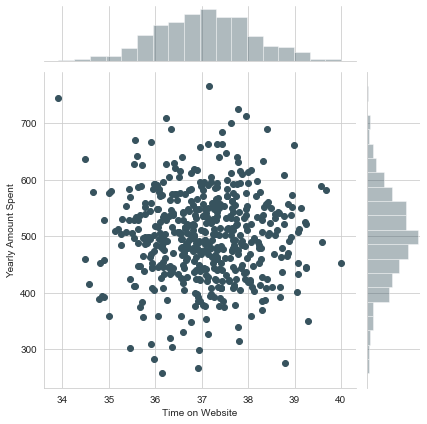

In [7]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

**Lo mismo pero ahora con la columna de tiempo en la aplicación (Time on App)**

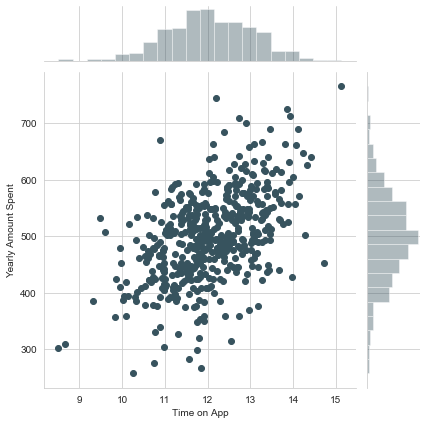

In [9]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers)

**Exploremos las relaciones que existen en todo el conjunto de datos. Usa [pairplot] (https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) para recrear el diagrama siguiente**

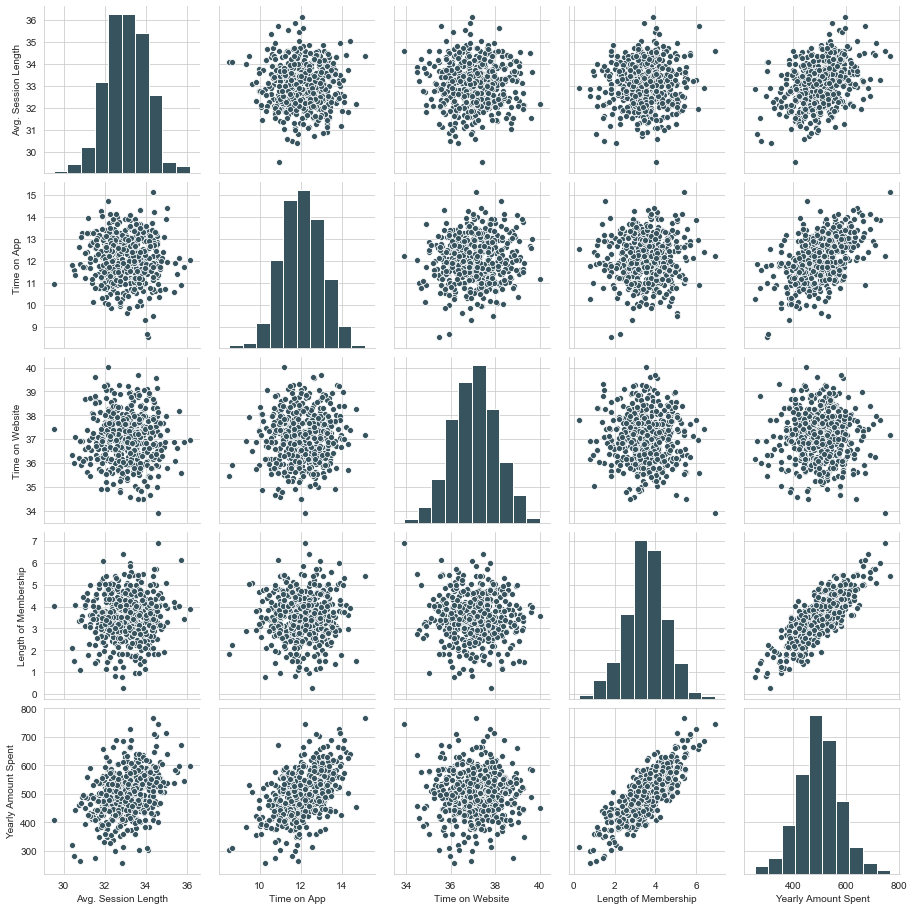

In [10]:
sns.pairplot(customers)

**Basado en esta gráfica, ¿cuál parece ser la característica más correlacionada con la cantidad anual gastada (Yearly Amount Spent)?**

In [ ]:
# Length of Membership 

**Crea un gráfico lineal (usando lmplot de seaborn) de la cantidad anual gastada (Yearly Amount Spent) vs. el tiempo de la membresía (Length of Membership).**

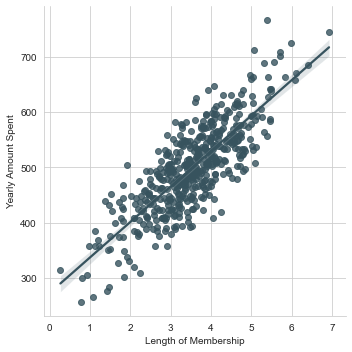

In [12]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

## Dividir el conjunto de datos en conjunto de entrenamiento y conjunto de pruebas

**Establece una variable "X" igual a las características numéricas de los clientes y una variable "y" igual a la columna cantidad anual gastada (Yearly Amount Spent).**

In [13]:
y = customers['Yearly Amount Spent']

In [14]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

**Usa la libraría model_selection.train_test_split de sklearn para dividir los datos en conjuntos de entrenamiento y prueba. Establece test_size = 0.3 y random_state = 101 **

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Entrenando el modelo

Ahora entrenemos el modelo con nuestros datos de entrenamiento!

**Importa la libreria LinearRegression de sklearn.linear_model**

In [17]:
from sklearn.linear_model import LinearRegression

**Crea una instancia de LinearRegression() llamada "lm".**

In [18]:
lm = LinearRegression()

In [19]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Imprime los coeficientes resultantes del modelo**

In [20]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
Avg. Session Length     25.981550
Time on App             38.590159
Time on Website          0.190405
Length of Membership    61.279097

In [21]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]


## Predicción

**Usa lm.predict() para predecir los valores con los datos de prueba (X_test) del conjunto de datos.**

In [22]:
predictions = lm.predict( X_test)

**Crea un gráfico de los valores reales contra los de la predicción**

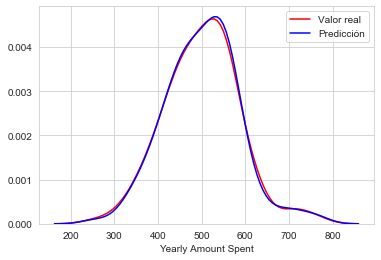

In [23]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Valor real")
sns.distplot(predictions, hist=False, color="b", label="Predicción" , ax=ax1)

Text(0, 0.5, 'Predicted Y')

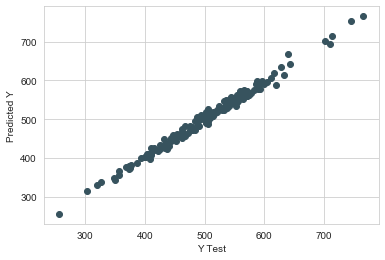

In [24]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluando el modelo


Evaluemos el rendimiento de nuestro modelo calculando la suma residual de cuadrados y el coeficiente de determinación (R ^ 2).

**Calcule el error absoluto medio, el error cuadrático medio y la raiz del error cuadrático medio. Consulte la conferencia o Wikipedia para las fórmulas**

In [25]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.228148653430838
MSE: 79.81305165097461
RMSE: 8.933815066978642


## Resultados

Deberías haber conseguido un muy buen modelo con un buen ajuste. Exploremos rápidamente los resultados para asegurarnos de que todo esté bien con nuestros datos.

**Traza un histograma de los residuos y asegúrate de que tenga una distribución normal. Use seaborn distplot o simplemente plt.hist ().**

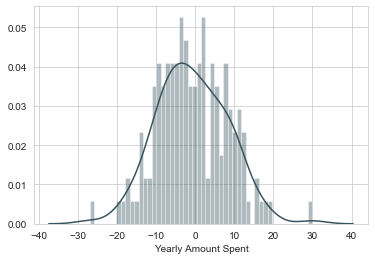

In [26]:
sns.distplot((y_test-predictions),bins=50);

## Conclusiones
Todavía necesitamos encontrar la respuesta a la pregunta original, ¿enfocamos nuestro esfuerzo en el desarrollo de aplicaciones móviles o sitios web? O tal vez eso ni siquiera importa, y el tiempo de membresía es lo realmente importante. Veamos si podemos interpretar los coeficientes para tener una idea.

**Recrea el dataframe de abajo.**

In [26]:
coefficients = pd.DataFrame(lm.coef_,X.columns)
coefficients.columns = ['Coefficient']
coefficients

Coefficient
Avg. Session Length     25.981550
Time on App             38.590159
Time on Website          0.190405
Length of Membership    61.279097

** ¿Como podemos interpretar los resultados? **

## Interpretando los coeficientes:

- Manteniendo todas las demás características fijas, un aumento de 1 unidad en **Avg. Session Length** está asociado con un aumento de **$25.98 dolares gastados**.  

- Manteniendo todas las demás características fijas, un aumento de 1 unidad en **Time on App** está asociado con un aumento de **$38.59 dolares gastados**.  

- Manteniendo todas las demás características fijas, un aumento de 1 unidad en **Time on Website** está asociado con un aumento de **$0.19 dolares gastados**.  

- Manteniendo todas las demás características fijas, un aumento de 1 unidad en **Length of Membership** está asociado con un aumento de **$61.27 dolares gastados**.   

¿Esto tiene sentido?

**¿Dónde crees que la empresa debe enfocarse: en la aplicación móbil o en su website?**

Esto es complicado; hay dos formas de pensar en esto: Desarrollar el sitio web para igualar el rendimiento con el de la aplicación móvil, o desarrollar más la aplicación, ya que eso es lo que funciona mejor. Este tipo de respuesta realmente depende de los otros factores que suceden en la empresa, ¡probablemente desees explorar la relación entre la duración de la membresía y la aplicación o el sitio web, antes de llegar a una conclusión!

## ¡Buen trabajo!